In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
from scipy.stats import linregress


# Study data files
cobra_09_path = "data/COBRA-2009-2019.csv"
cobra_20_path = "data/COBRA-2020.csv"
cobra_21_path = "data/COBRA-2021.csv"
county_cases_path = "data/county_cases.csv"

# Read the mouse data and the study results
cobra_09 = pd.read_csv(cobra_09_path)
cobra_20 = pd.read_csv(cobra_20_path)
cobra_21 = pd.read_csv(cobra_21_path)
county_cases = pd.read_csv(county_cases_path)


# Combine the data into a single dataset
#study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
#study_data_complete

C:\Users\anton\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
cobra_09.columns = ['offense_id','rpt_date','occur_date','occur_time','poss_date','poss_time','beat','apt_office_prefix', 'apt_office_num', 'location', 'shift_occurence','location_type','UC2_Literal','UC2#','ibr_code','neighborhood','npu','lat','long']
cobra_09 = cobra_09.drop(columns = ['apt_office_prefix','apt_office_num','shift_occurence','location_type','UC2#', 'poss_date'])
cobra_09

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,2009-01-01,2009-01-01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,2019-12-31,2019-12-31,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,2019-12-31,2019-12-31,432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,2019-12-31,2019-12-31,920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,2019-12-31,2019-12-31,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [3]:
cobra_09['rpt_date']= pd.to_datetime(cobra_09['rpt_date'])
cobra_09['occur_date']= pd.to_datetime(cobra_09['occur_date'])
cobra_09['rpt_date'] = cobra_09['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_09['occur_date'] = cobra_09['occur_date'].dt.strftime("%m/%d/%Y")
cobra_09.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [4]:
cobra_09.insert(3,'occur_year',cobra_09['occur_date'].str[-4:])
cobra_09_delete = cobra_09.loc[cobra_09['occur_year'].str[:2] != '20']
cobra_09_delete_list = cobra_09_delete['offense_id'].to_list()
cobra_09 = cobra_09[~cobra_09['offense_id'].isin(cobra_09_delete_list)]
cobra_09

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,12/31/2019,12/31/2019,2019,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,12/31/2019,12/31/2019,2019,432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,12/31/2019,12/31/2019,2019,920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,12/31/2019,12/31/2019,2019,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [5]:
cobra_20 = cobra_20.drop(columns = ['apt_office_prefix','apt_office_num','MinOfucr','dispo_code','Shift','loc_type', 'poss_date'])
cobra_20_reorder = ['offense_id','rpt_date','occur_date','occur_time','poss_time','beat','location','ibr_code','UC2_Literal','neighborhood','npu','lat','long']
cobra_20_reordered = cobra_20.reindex(columns = cobra_20_reorder)
cobra_20 = cobra_20_reordered.copy()

In [6]:
cobra_20.insert(3,'occur_year',cobra_20['occur_date'].str[-4:])
cobra_20_delete = cobra_20.loc[cobra_20['occur_year'].str[:2] != '20']
cobra_20_delete_list = cobra_20_delete['offense_id'].to_list()
cobra_20 = cobra_20[~cobra_20['offense_id'].isin(cobra_20_delete_list)]
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [7]:
cobra_20['rpt_date']= pd.to_datetime(cobra_20['rpt_date'])
cobra_20['occur_date']= pd.to_datetime(cobra_20['occur_date'])
cobra_20['rpt_date'] = cobra_20['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_20['occur_date'] = cobra_20['occur_date'].dt.strftime("%m/%d/%Y")
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [8]:
cobra_21 = cobra_21.drop(columns = ['occur_day','occur_day_num','occur_day_num','zone', 'poss_date'])
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [9]:
cobra_21.insert(3,'occur_year',cobra_21['occur_date'].str[-4:])
cobra_21_delete = cobra_21.loc[cobra_21['occur_year'].str[:2] != '20']
cobra_21_delete_list = cobra_21_delete['offense_id'].to_list()
cobra_21 = cobra_21[~cobra_21['offense_id'].isin(cobra_21_delete_list)]
cobra_21

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23F,LARCENY-FROM VEHICLE,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,00:35,00:45,111,"71 LINKWOOD RD NW\r\nATL, GA 30311\r\nUNITED S...",13A,AGG ASSAULT,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,02:49,03:28,409,"3113 CAMPBELLTON RD SW\r\nATLANTA, GA 30311\r\...",240,AUTO THEFT,Southwest,R,33.692468,-84.490825
17630,213000875,8/18/2021,7/10/2021,2021,16:00,12:14,612,"491 FLAT SHOALS AVE SE\r\nATLANTA, GA 30316\r\...",23F,LARCENY-FROM VEHICLE,East Atlanta,W,33.740555,-84.346336


In [10]:
cobra_21['rpt_date']= pd.to_datetime(cobra_21['rpt_date'])
cobra_21['occur_date']= pd.to_datetime(cobra_21['occur_date'])
cobra_21['rpt_date'] = cobra_21['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_21['occur_date'] = cobra_21['occur_date'].dt.strftime("%m/%d/%Y")
cobra_21

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,05/20/2021,05/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,08/06/2021,08/06/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,06/28/2021,06/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,01/05/2021,01/04/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,09/18/2021,09/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23F,LARCENY-FROM VEHICLE,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,00:35,00:45,111,"71 LINKWOOD RD NW\r\nATL, GA 30311\r\nUNITED S...",13A,AGG ASSAULT,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,02:49,03:28,409,"3113 CAMPBELLTON RD SW\r\nATLANTA, GA 30311\r\...",240,AUTO THEFT,Southwest,R,33.692468,-84.490825
17630,213000875,08/18/2021,07/10/2021,2021,16:00,12:14,612,"491 FLAT SHOALS AVE SE\r\nATLANTA, GA 30316\r\...",23F,LARCENY-FROM VEHICLE,East Atlanta,W,33.740555,-84.346336


In [11]:
concat_list = [cobra_09, cobra_20, cobra_21]  # List of your dataframes
crime_df_complete = pd.concat(concat_list)
crime_df_complete.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [12]:
crime_df_complete.insert(4,'occur_month',crime_df_complete['occur_date'].str[:2])
crime_df_complete.insert(5,'occur_day',crime_df_complete['occur_date'].str[3:5])

In [13]:
crime_df_complete

,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,01,01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.688450,-84.493280
1,90011083,01/01/2009,01/01/2009,2009,01,01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.753200,-84.392010
2,90011208,01/01/2009,01/01/2009,2009,01,01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.757350,-84.502820
3,90011218,01/01/2009,01/01/2009,2009,01,01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.846760,-84.362120
4,90011289,01/01/2009,01/01/2009,2009,01,01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.686770,-84.497730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,10,21,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",LARCENY-FROM VEHICLE,23F,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,10,21,00:35,00:45,111,"71 LINKWOOD RD NW\r\nATL, GA 30311\r\nUNITED S...",AGG ASSAULT,13A,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,10,21,02:49,03:28,409,"3113 CAMPBELLTON RD SW\r\nATLANTA, GA 30311\r\...",AUTO THEFT,240,Southwest,R,33.692468,-84.490825
17630,213000875,08/18/2021,07/10/2021,2021,07,10,16:00,12:14,612,"491 FLAT SHOALS AVE SE\r\nATLANTA, GA 30316\r\...",LARCENY-FROM VEHICLE,23F,East Atlanta,W,33.740555,-84.346336


In [14]:
county_cases.columns = ['County Name','Cases','County ID','State FIPS Code','County FIPS Code','Population','Hospitalization','Deaths', 'Case Rate', 'Death Rate', '14 Day Case Rate','14 Day Cases','Antigen Cases','Probable Deaths']
county_cases.head()

,County Name,Cases,County ID,State FIPS Code,County FIPS Code,Population,Hospitalization,Deaths,Case Rate,Death Rate,14 Day Case Rate,14 Day Cases,Antigen Cases,Probable Deaths
0,Appling,2761,US-13001,13,1,18561,234,94,14875.28,506.44,269.38,50,720,9
1,Atkinson,1171,US-13003,13,3,8330,172,29,14057.62,348.14,252.10,21,395,5
2,Bacon,1856,US-13005,13,5,11404,147,47,16274.99,412.14,306.91,35,646,11
3,Baker,241,US-13007,13,7,3116,43,13,7734.27,417.20,64.18,2,138,1
4,Baldwin,5232,US-13009,13,9,44428,381,162,11776.36,364.63,126.05,56,1399,22


In [15]:
reduced_df = crime_df_complete[["occur_year", "offense_id"]]
reduced_df.head()                                       

,occur_year,offense_id
0,2009,90010930
1,2009,90011083
2,2009,90011208
3,2009,90011218
4,2009,90011289


In [21]:
Totalcrime=pd.pivot_table(crime_df_complete, values = "offense_id", index = "occur_year", aggfunc = "count")
Totalcrime

,offense_id
occur_year,
2000,2
2001,7
2003,1
2004,2
2005,4
2006,7
2007,16
2008,341
2009,39326


In [17]:
#SelectionYears

SelectionYears=Totalcrime.iloc[8:,:]
SelectionYears

,offense_id
occur_year,
2009,39326
2010,35530
2011,34852
2012,33383
2013,32398
2014,31115
2015,30059
2016,29007
2017,26386


In [18]:
Years=SelectionYears.reset_index()
Years

,occur_year,offense_id
0,2009,39326
1,2010,35530
2,2011,34852
3,2012,33383
4,2013,32398
5,2014,31115
6,2015,30059
7,2016,29007
8,2017,26386
9,2018,25615


<AxesSubplot:xlabel='occur_year'>

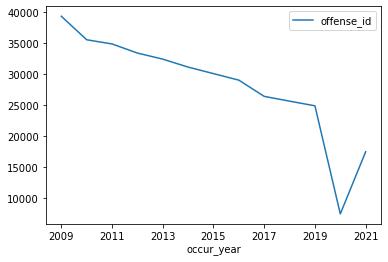

In [19]:
Years.plot(x = "occur_year", y = "offense_id" )

<AxesSubplot:xlabel='occur_year'>

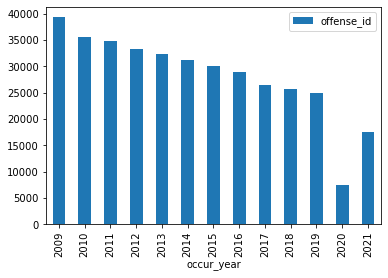

In [20]:
Years.plot(x = "occur_year", y = "offense_id", kind = "bar" )
